Universidade Federal do Rio Grande do Sul (UFRGS)

Programa de Pós-Graduação em Engenharia Civil (PPGEC)

PEC00025: Introdução à Teoria de Vibrações

## Trabalho I:
# Resposta de um sistema com 1 gdl a uma excitação na base: espectro de pseudo aceleração

__Discente:__ 00312135 - Cleiton Ricardo Oestreich

### 1. Introdução

A ação dinâmica resultante da excitação induzida pela movimentação humana sobre certos tipos de estruturas, ainda que possa provocar níveis de vibração pouco significativos do ponto de vista da segurança estrutural, poderá gerar algum desconforto ou temor, caso se verifiquem níveis de vibração elevados. Isso acontece, devido à possibilidade de ocorrência de fenómenos de ressonância associados à proximidade da frequência de excitação dinâmica e das frequências naturais da estrutura. Por conseguinte, este trabalho apresenta uma análise da vibração de uma estrutura metálica com 1 grau de liberdade quando submetida a ação dinâmica correspondente ao tráfego de pessoas.

### 2. Objetivos

Este trabalho pretende medir a excitação de uma estrutura submetida a uma ação dinâmica e calcular a resposta à excitação na base. Como resultado, este estudo objetiva apresentar os valores máximos de deslocamento da estrutura ao longo do tempo, um periodograma e um espectro de resposta de pseudo-aceleração. O objeto de estudo se caracteriza por ser uma escadaria metálica, localizada em um centro comercial de grande circulação de pessoas.

### 3. Materiais e métodos

Neste estudo, a fim de se analisar a vibração do patamar central da escada metálica (meio do vão), foi utilizado o aplicativo iNVH da Bosch, disponível gratuitamente para *download* em *smarthphones da plataforma Android*, que monitora as vibrações da estrutura nos eixos _x, y e z_, e grava estes dados em um arquivo no formato .csv para análise _a posteriori_. Para a compilação das informações, cálculos e gráficos e para a análise dos dados coletados foi utilizada uma solução númerica baseada no método da Integral de Duhamel, implementada no _MRPy - Multivariate Random Processes with Python_, uma rotina computacional em _Python_, desenvolvida pelo Prof. Marcelo Maia Rocha para análise dinâmica de sistemas estruturais. A vibração da estrutura foi monitorada pelo acelerômetro do *smartphone Samsung Galaxy S5*. No momento do posicionamento do equipamento, a estrutura encontrava-se encontrava-se em repouso, ou seja, sem tráfego. Em seguida, com o início do trânsito de pessoas, iniciou-se a leitura da oscilação da escada.

### 4. Definição dos parâmetros iniciais
Para a análise da estrutura é necessário a definição das propriedades mecânicas do sistema com 1 grau de liberdade. A massa da estrutura, dada em quilogramas, corresponde às dimensões do patamar metálico em que se realizou a medição. São fornecidos, também, os valores correspondentes a frequência natural de vibração, medida em Hertz, o coeficiente de amortecimento, o deslocamento e velocidade inicial da estrutura (inicialmente em repouso), em metros e em metros por segundo, respectivamente.

In [1]:
# Para importar os módulos Python necessários para a exibição completa deste notebook esta célula deve ser executada.
# Comando: "shift + enter".

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [2]:
m = 15;                    # Massa do sistema em kg
fn = 1;                    # Frequência natural
zt = 0.01;                 # Coeficiente de amortecimento
u0 = 0;                    # Deslocamento inicial
v0 = 0;                    # Velocidade inicial             

### 5. Dados de gravação
Após a definição dos parâmetros iniciais, procede-se com a leitura do arquivo em formato .csv. O tempo de gravação do movimento vibratório foi de t0 = 0 a tf = 15 segundos. Por conseguinte, plota-se o gráfico de aceleração X tempo para cada um dos eixos x, y e z (Gráficos 1, 2 e 3).

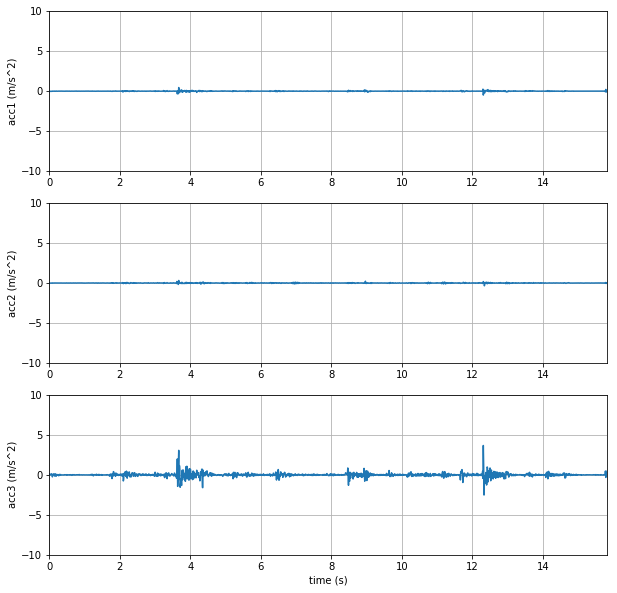

In [3]:
data = MRPy.from_file('312135', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(10, 10), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Os dados de gravação que relacionam o movimento vibratório da escada estão plotados no gráfico corresponde ao eixo _z_, ou seja, a vibração da estrutura devido a oscilação na base provocada pelo caminhar das pessoas (Gráfico 4).

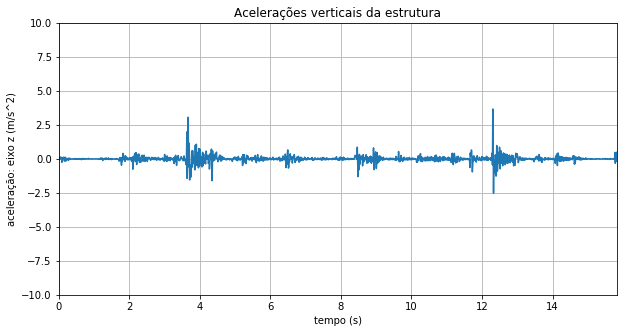

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(10, 5), clear=True)
plt.title("Acelerações verticais da estrutura")
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-10, 10);   plt.ylabel('aceleração: eixo z (m/s^2)') 

plt.grid(True) 

### 6. Cálculo dos deslocamentos pelo método da Integral de Duhamel
Utilizando-se do método da Integral de Duhamell, é possível encontrar os deslocamentos da estrutura ao longo do tempo em respota ao impacto dinâmico (Gráfico 5):

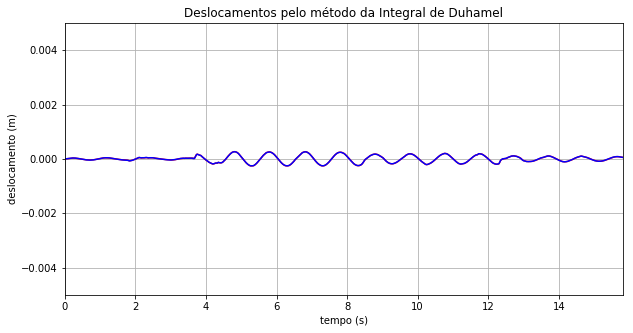

In [5]:
fn=1
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
plt.figure(8, figsize=(10, 5), clear=True)
plt.title("Deslocamentos pelo método da Integral de Duhamel")
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('tempo (s)') 
plt.ylim(-0.005, 0.005);   plt.ylabel('deslocamento (m)') 

plt.grid(True) 

### 7. Espectro de pseudoaceleração


A partir do gráfico acima, pode-se extrair o gráfico do espectro de pseudoacelaração, que pode ser definido como uma resposta gráfica que relaciona o valor da força de restituição elástica com o período natural e/ou da frequência natural para um sistema de um grau de liberdade, considerando uma determinada excitação. O gráfico é obtido a partir da variação do comportamento da estrutura para diferentes valores de frequência natural (fn). Deste cenário, também é possível extrair dados importantes como o maior deslocamento vertical do patamar da escada, o valor de frequência natural que apresenta o maior deslocamento em z e o valor correspondente a rigidez da estrutura (Gráficos 6 e 7).

Maior deslocamento: 0.0006734002062429507
Frequência natural correspondente ao pior cenário de u: 0.1
Rígidez da estrutura= 5.921762640653615
Feq= 0.0006734002062429507


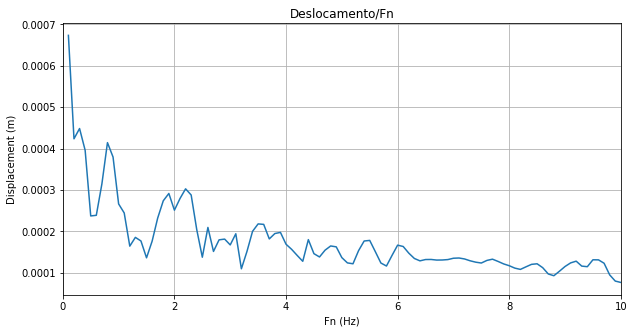

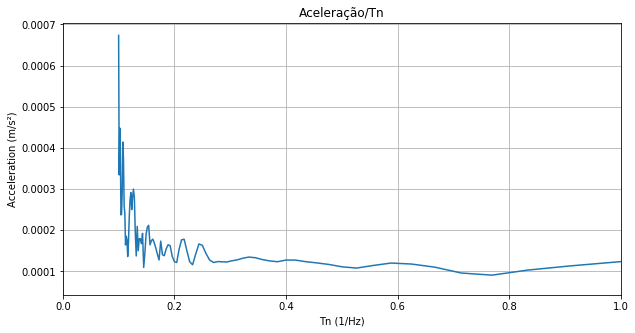

In [25]:
fn = 0
Lfn = []
Lumax=[]
Lwn = []
Ltn = []
for nume in range(100):
    fn += 0.1
    Lfn.append(fn)
    Ltn.append(1/fn)
    u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    mini=u_FD.min()
    maxi=u_FD.max()
    mini = mini * -1
    if mini>maxi:
        Lumax.append(mini)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)
    else:
        Lumax.append(maxi)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)

maior=max(Lumax)
print ('Maior deslocamento:',maior)   
n_pos = Lumax.index(maior)
maiorfn=Lfn[n_pos]
_wn=2*np.pi*maiorfn
k=_wn*_wn*m
Feq=k*maior
print('Frequência natural correspondente ao pior cenário de u:',maiorfn)
print('Rígidez da estrutura=',k)
print('Feq=',maior)

plt.figure(9, figsize=(10, 5), clear=True)
plt.plot(Lfn,Lumax)

plt.xlim(0, 10);        plt.xlabel('Fn (Hz)') 
plt.ylabel('Displacement (m)') 
plt.title('Deslocamento/Fn')
plt.grid(True) 

Ltn.reverse()

plt.figure(10, figsize=(10, 5), clear=True)
plt.plot(Ltn,Lwn)

plt.xlim(0, 1);        plt.xlabel('Tn (1/Hz)') 
plt.ylabel('Acceleration (m/s²)') 
plt.title('Aceleração/Tn')
plt.grid(True)

### 8. Periodograma

O gráfico do periodograma premite observar o valor de energia máxima em referência a frequência de vibração da estrutura, ou seja, o valor que corresponde à frequência natural de vibração do sistema. 

Valor de pico: 29.013974305755326 Hz


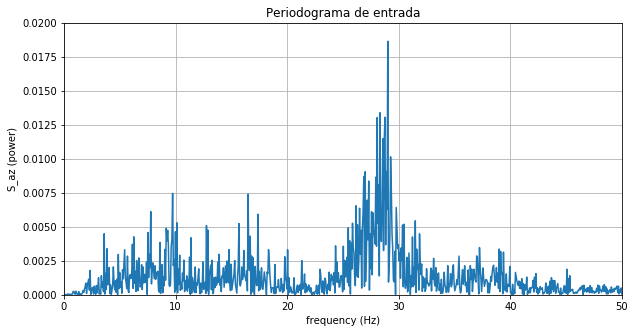

In [17]:
Saz, fs = az.periodogram()
f       = az.f_axis()
plt.figure(12, figsize=(10, 5), clear=True)
plt.title("Periodograma de entrada")
plt.plot(f, Saz[0])

plt.xlim(0, 50);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.02);   plt.ylabel('S_az (power)') 

plt.grid(True)

fpico = f[np.argmax(Saz[0])]
print("Valor de pico:", fpico, "Hz")

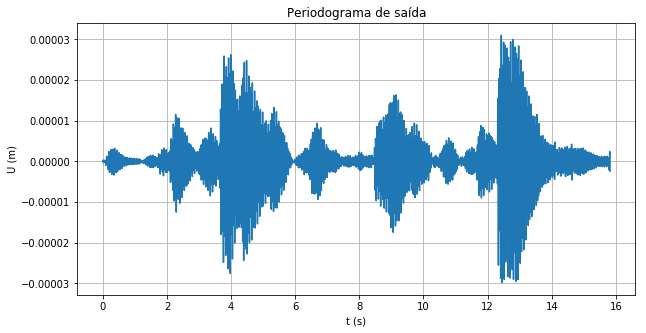

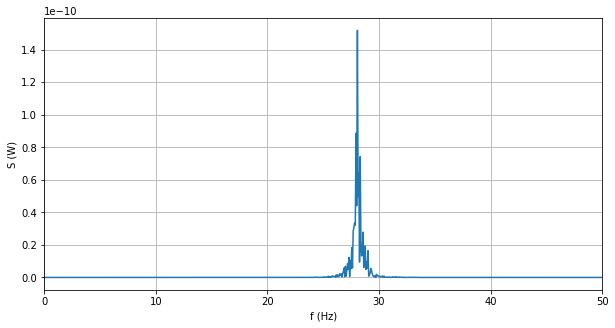

In [19]:
# Cálculo periodograma de saída

fnout = 28
uout = az.sdof_Duhamel(fnout, zt, u0, v0)/m

plt.figure(figsize=(10, 5))
plt.title("Periodograma de saída")
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(10, 5))
plt.plot(fout, Sout[0])
plt.xlim(0, 15); plt.xlabel('f (Hz)') 
plt.xlim(0, 50); plt.ylabel('S (W)') 

plt.grid(True)

### 9.Considerações finais

A partir das leituras de oscilação vertical medidas pelo ensaio experimental de campo, verificou-se que que no gráfico do periodograma a maior energia encontra-se na frequência natural de 29,01 $Hz$.